In [5]:
import pandas as pd
import numpy as np


In [6]:
df = pd.read_csv('/content/Power Plant Data.csv')

# **Context :**
The dataset contains data points collected from a Combined Cycle Power Plant
over 6 years (2006-2011) when the plant was set to work with a full load.

Data Dictionary:
Features consist of hourly average ambient variables
- Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

- Net hourly electrical energy output (PE) 420.26-495.76 MW
This is the regressand (dependent variable) for the given task.

In [7]:
df.head()

AT      V       AP     RH      PE
0  14.96  41.76  1024.07  73.17  463.26
1  25.18  62.96  1020.04  59.08  444.37
2   5.11  39.40  1012.16  92.14  488.56
3  20.86  57.32  1010.24  76.64  446.48
4  10.82  37.50  1009.23  96.62  473.90

In [11]:
df.shape

(9568, 5)

In [8]:
df.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
df.describe()

AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

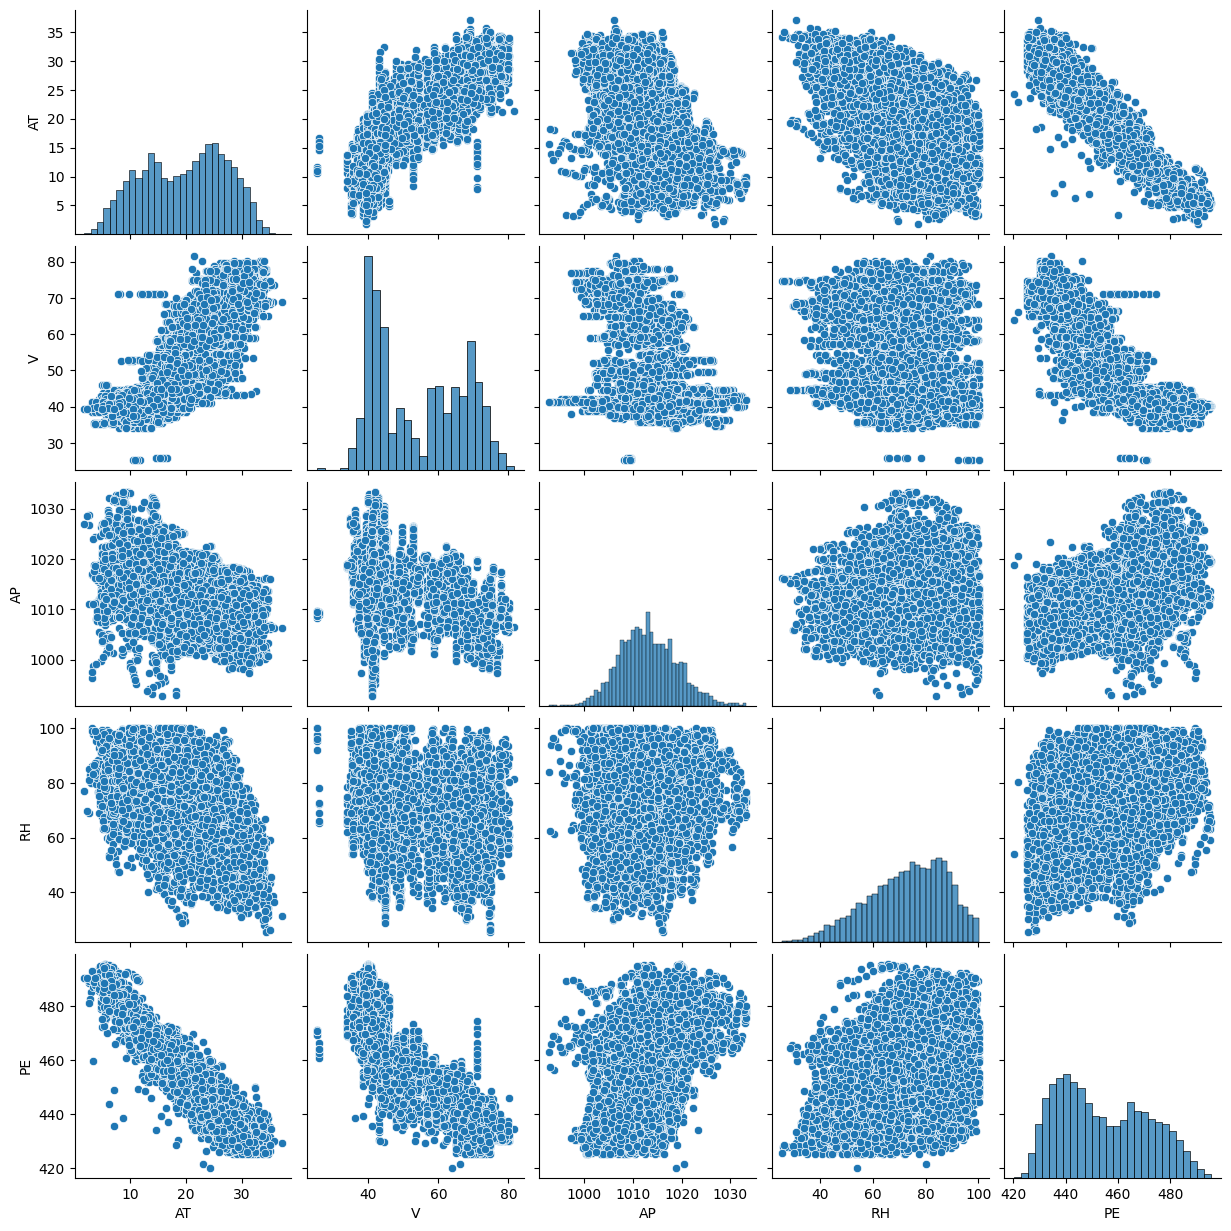

In [14]:
import seaborn as sns
sns.pairplot(data=df)

<Axes: >

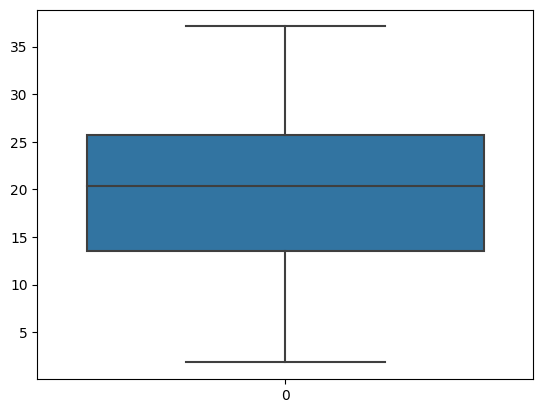

In [16]:
sns.boxplot(df['AT'])

<Axes: >

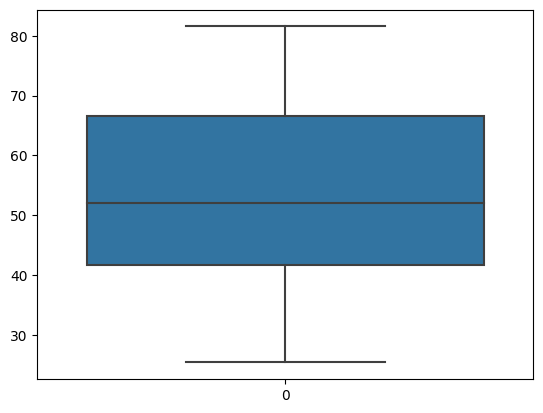

In [17]:
sns.boxplot(df['V'])

<Axes: >

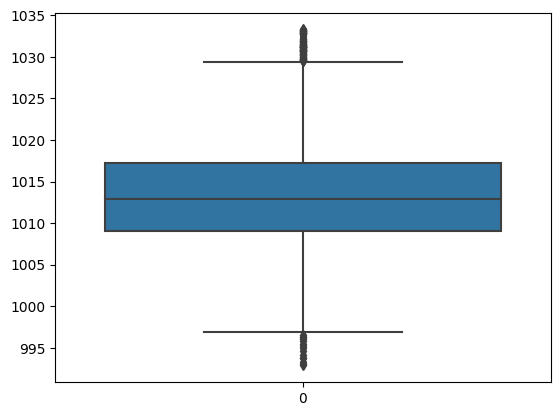

In [18]:
sns.boxplot(df['AP'])

<Axes: >

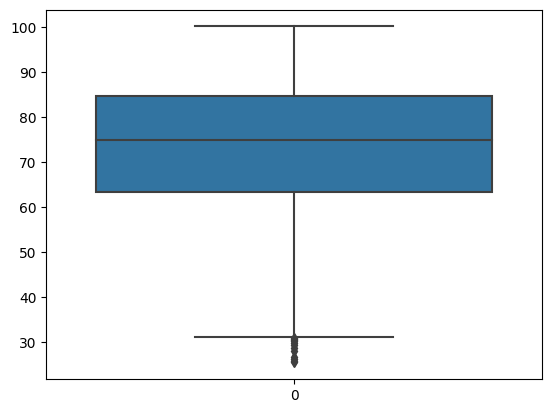

In [19]:
sns.boxplot(df['RH'])

<Axes: >

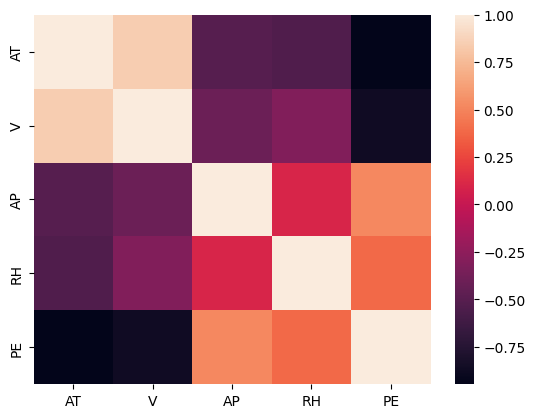

In [20]:
sns.heatmap(df.corr())

In [32]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming df_cleaned_normalized contains your cleaned and normalized data

# Split the data into features and target variable
X = df[['AT', 'V', 'AP', 'RH']]  # Features
y = df['PE']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a MinMaxScaler to normalize features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an ANN model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer with the number of input features
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    keras.layers.Dense(1)  # Output layer with a single neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')  # Use mean squared error for regression

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Mean Squared Error on Test Data: {loss:.2f}')


Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 166345.9531
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 10895.6924
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 2830.8013
Epoch 4/100
240/240 [==============================] - 2s 8ms/step - loss: 2195.9529
Epoch 5/100
240/240 [==============================] - 1s 5ms/step - loss: 1755.4349
Epoch 6/100
240/240 [==============================] - 1s 4ms/step - loss: 1467.1178
Epoch 7/100
240/240 [==============================] - 0s 2ms/step - loss: 1227.0963
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 1048.0574
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 900.2700
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 767.0828
Epoch 11/100
240/240 [==============================] - 0s 2ms/step - loss: 646.8909
Epoch 12/100
240/240 [==============================] - 0s 2ms/

In [39]:
import numpy as np

# Assuming you have already defined and trained your model and X_test
y_pred = model.predict(X_test)

np.set_printoptions(precision=2)

# Now, you can reshape the arrays and print them
print(np.column_stack((y_pred, y_test)))


60/60 [==============================] - 0s 4ms/step
[[456.38 455.27]
 [437.55 436.31]
 [433.64 440.68]
 ...
 [483.64 479.53]
 [435.08 435.76]
 [458.83 457.1 ]]


**1. Why do we need to check for outliers in our data?**
Outliers can significantly affect the performance and accuracy of machine learning models, including neural networks. They can lead to incorrect model assumptions, skewed predictions, and increased model variance. Detecting and handling outliers is essential to ensure the model's robustness and generalization to unseen data.

**2. Why is scaling required for neural networks?**
Scaling is necessary for neural networks to ensure that all input features contribute equally to the model's learning process. Without scaling, features with larger scales or magnitudes can dominate the learning, leading to slower convergence and potential instability. Normalizing the data to a consistent range, such as [0, 1] using methods like Min-Max scaling, helps neural networks perform better.

**3. Briefly explain your choice of optimizer.**
I used the "adam" optimizer, which is a popular choice for training neural networks. Adam stands for "Adaptive Moment Estimation" and combines the benefits of two other optimization techniques, RMSprop and Momentum. It adapts the learning rate during training, making it efficient for a wide range of problems and often converging faster compared to traditional optimizers like Stochastic Gradient Descent (SGD).

**4. Which activation function did you use and why?**
I used the ReLU (Rectified Linear Unit) activation function. ReLU is commonly chosen for hidden layers in neural networks because it introduces non-linearity while being computationally efficient. It helps the model learn complex patterns and avoid vanishing gradient problems. Additionally, ReLU can mitigate the vanishing gradient problem, making it a suitable choice for many deep learning applications.